Predict (before training) 4 4.0
Epoch: 0 w= 1.0933333333333333 loss= 4.666666666666667
Predict (after training) 4 4.373333333333333
Epoch: 1 w= 1.1779555555555554 loss= 3.8362074074074086
Predict (after training) 4 4.711822222222222
Epoch: 2 w= 1.2546797037037036 loss= 3.1535329869958857
Predict (after training) 4 5.0187188148148145
Epoch: 3 w= 1.3242429313580246 loss= 2.592344272332262
Predict (after training) 4 5.2969717254320985
Epoch: 4 w= 1.3873135910979424 loss= 2.1310222071581117
Predict (after training) 4 5.54925436439177
Epoch: 5 w= 1.4444976559288012 loss= 1.7517949663820642
Predict (after training) 4 5.777990623715205
Epoch: 6 w= 1.4963445413754464 loss= 1.440053319920117
Predict (after training) 4 5.9853781655017855
Epoch: 7 w= 1.5433523841804047 loss= 1.1837878313441108
Predict (after training) 4 6.173409536721619
Epoch: 8 w= 1.5859728283235668 loss= 0.9731262101573632
Predict (after training) 4 6.343891313294267
Epoch: 9 w= 1.6246153643467005 loss= 0.7999529948031382
Pred

/var/folders/hn/6r2r8g455836r220bly55vv80000gn/T/ipykernel_20020/1866091885.py:65: UserWarning: Glyph 26435 (\N{CJK UNIFIED IDEOGRAPH-6743}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/hn/6r2r8g455836r220bly55vv80000gn/T/ipykernel_20020/1866091885.py:65: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/hn/6r2r8g455836r220bly55vv80000gn/T/ipykernel_20020/1866091885.py:65: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/hn/6r2r8g455836r220bly55vv80000gn/T/ipykernel_20020/1866091885.py:65: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/acw/llm-env/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26435 (\N{CJK UNIFIED IDEOGRAPH-6743}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **

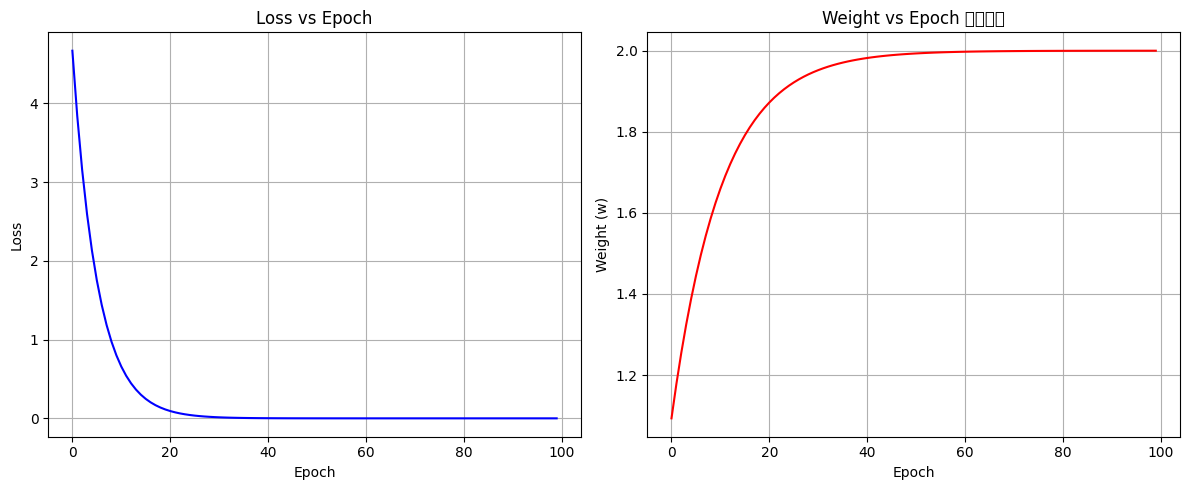

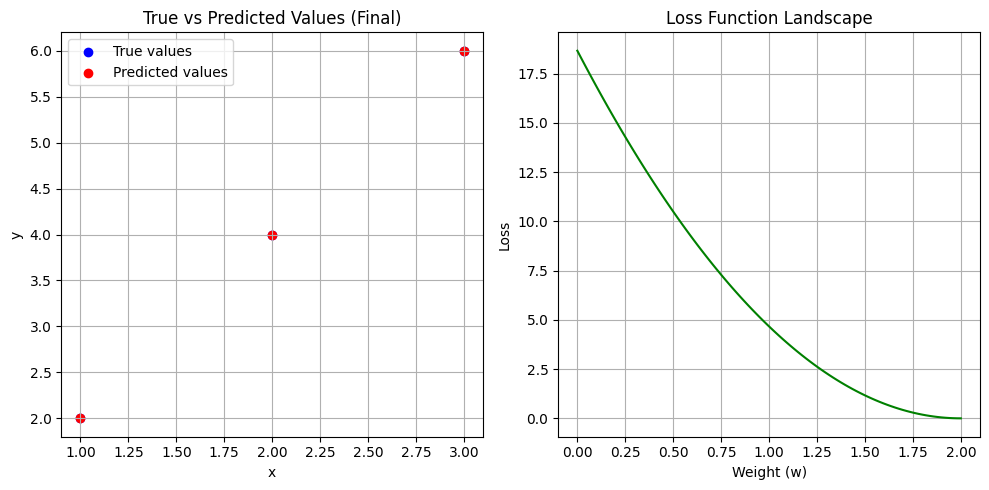

In [14]:
import matplotlib.pyplot as plt
import numpy as np


x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = 1.0

def forward(x):
    return x * w
def cost(xs,ys):
    cost = 0
    #同时遍历 xs 和 ys 两个列表，在每次迭代中，x 取自 xs，y 取自 ys，且它们具有相同的索引位置，
    # 实现输入数据和目标数据的配对处理。
    for x,y in zip(xs,ys):
        y_pred = forward(x)
        cost += (y_pred - y) ** 2
    return cost / len(xs)

def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs, ys):
        grad += 2 * x * (x * w - y)
    return grad / len(xs)

# 存储每次迭代的数据用于可视化
w_list = []
loss_list = []
epoch_list = []
print("Predict (before training)",4,forward(4))

for epoch in range(100):
    cost_cal = cost(x_data,y_data)
    grad_cal = gradient(x_data,y_data)
    w = w - 0.01 * grad_cal
    # 记录数据  
    # 记录数据
    w_list.append(w)
    loss_list.append(cost_cal)
    epoch_list.append(epoch)
    
    print("Epoch:",epoch,"w=",w,"loss=",cost_cal)
    print("Predict (after training)",4,forward(4))
   

# 可视化结果
plt.figure(figsize=(12, 5))
# 绘制损失函数变化
plt.subplot(1, 2, 1)
plt.plot(epoch_list, loss_list, 'b-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)

# 绘制权重变化
plt.subplot(1, 2, 2)
plt.plot(epoch_list, w_list, 'r-')
plt.xlabel('Epoch')
plt.ylabel('Weight (w)')
plt.title('Weight vs Epoch 权重变化')
plt.grid(True)

#plt.tight_layout()用于自动调整图形中子图的位置，以确保它们不会重叠并且能够完整地显示在图形窗口内
plt.tight_layout()
plt.show()

# 可选：绘制预测值与真实值的对比
# plt.figure：这是一个可选参数，用于指定图形的宽度和高度（以英寸为单位）
# 创建一个10英寸宽、5英寸高的图形
plt.figure(figsize=(10, 5))

# 绘制训练数据的预测结果
y_pred_list = [forward(x) for x in x_data]
plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, label='True values', color='blue')
plt.scatter(x_data, y_pred_list, label='Predicted values', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Values (Final)')
plt.legend()
plt.grid(True)

# 绘制损失函数的3D表面图
plt.subplot(1, 2, 2)#一个1×2的网格，总共2个子图位置
#np.linspace()用于在指定的范围内创建均匀间隔的数值数组
#创建一个从0到2的数组，包含100个均匀分布的点
w_range = np.linspace(0, 2, 100)
loss_range = []
for w_temp in w_range:
    w = w_temp  # 临时设置w值计算损失
    loss_range.append(cost(x_data, y_data))

plt.plot(w_range, loss_range, 'g-')
plt.xlabel('Weight (w)')
plt.ylabel('Loss')
plt.title('Loss Function Landscape')
plt.grid(True)

plt.tight_layout()
plt.show()


zip 是 Python 内置函数，用于将多个可迭代对象（如列表、元组等）打包成一个迭代器。
将多个可迭代对象的元素按位置一一配对
返回一个迭代器，包含元组形式的配对元素

#### plt.subplot(1, 2, 2) 是 matplotlib 库中用于创建子图的函数调用
plt.subplot(nrows, ncols, index) 有三个参数：
nrows：子图的行数
ncols：子图的列数
index：当前子图的索引位置（从1开始计数）

#### np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
主要参数说明
start: 起始值
stop: 结束值
num: 要生成的样本数量，默认为50
endpoint: 是否包含结束值，默认为True
retstep: 是否返回步长，默认为False
dtype: 输出数组的数据类型，如果未指定则自动推断
功能说明
np.linspace 函数会在指定的起始值和结束值之间生成指定数量的均匀分布的数值。这些数值在数学上是等间距的。

predict (before training) 4 0.4000000059604645
	grad: 1.0 2.0 tensor([-3.8000])
progress: 0 3.609999895095825
	grad: 2.0 4.0 tensor([-14.8960])
progress: 0 13.868175506591797
	grad: 3.0 6.0 tensor([-30.8347])
progress: 0 26.410554885864258
	grad: 1.0 2.0 tensor([-2.8094])
progress: 1 1.9731618165969849
	grad: 2.0 4.0 tensor([-11.0128])
progress: 1 7.580097198486328
	grad: 3.0 6.0 tensor([-22.7965])
progress: 1 14.435539245605469
	grad: 1.0 2.0 tensor([-2.0770])
progress: 2 1.0784952640533447
	grad: 2.0 4.0 tensor([-8.1419])
progress: 2 4.143146991729736
	grad: 3.0 6.0 tensor([-16.8537])
progress: 2 7.890209197998047
	grad: 1.0 2.0 tensor([-1.5356])
progress: 3 0.5894862413406372
	grad: 2.0 4.0 tensor([-6.0194])
progress: 3 2.264570474624634
	grad: 3.0 6.0 tensor([-12.4601])
progress: 3 4.312647342681885
	grad: 1.0 2.0 tensor([-1.1353])
progress: 4 0.3222026526927948
	grad: 2.0 4.0 tensor([-4.4502])
progress: 4 1.2377738952636719
	grad: 3.0 6.0 tensor([-9.2119])
progress: 4 2.3572170734

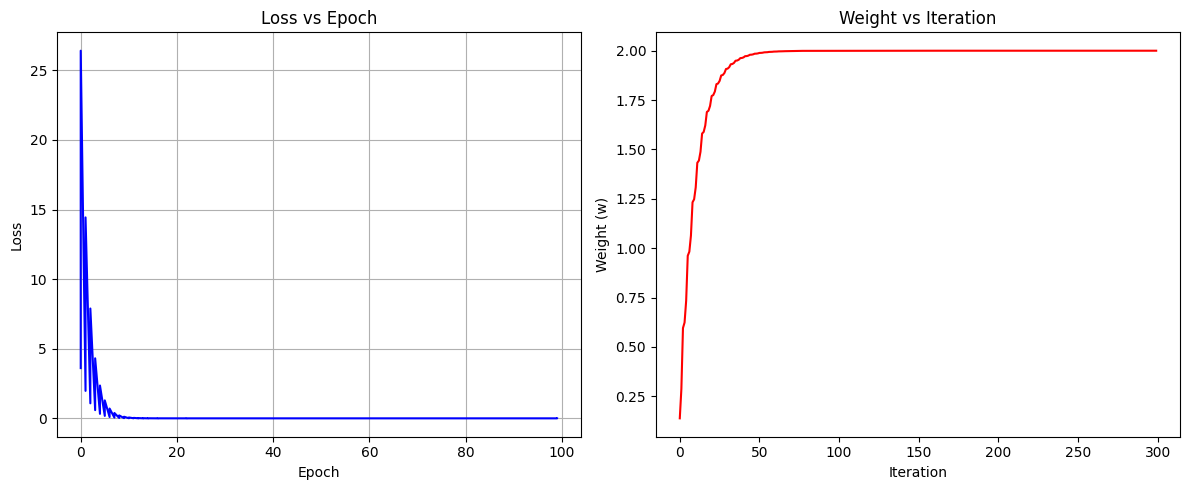

predict (after training) 4 7.999998569488525


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torch


x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = torch.Tensor([0.1])
w.requires_grad= True


def forward(x):
    return x*w


def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)**2
print("predict (before training)",4,forward(4).item())

# 存储每次迭代的数据用于可视化
w_list = []
loss_list = []
epoch_list = []

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        l = loss(x,y)
        l.backward()
        print("\tgrad:",x,y,w.grad)
        w.data = w.data - 0.01*w.grad.data
        w.grad.data.zero_()
        # 注意：这里要使用 .item() 或 .detach() 来避免梯度追踪问题
        #w_list.append(w.data)
        w_list.append(w.item()) # 使用 .item() 获取标量值
        #loss_list.append(l)
        loss_list.append(l.item())
        epoch_list.append(epoch)
        print("progress:",epoch,l.item())
        
#创建一个新的图形窗口 
plt.figure(figsize=(12, 5))
# 绘制损失随迭代次数的变化 
plt.subplot(1,2,1)
plt.plot(epoch_list, loss_list, 'b-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)


# 绘制权重随迭代次数的变化
plt.subplot(1, 2, 2)
#range(len(w_list))用于生成 x 轴的数据点，通常代表训练的轮次（epoch）或迭代次数。
plt.plot(range(len(w_list)), w_list, 'r-')
plt.xlabel('Iteration')
plt.ylabel('Weight (w)')
plt.title('Weight vs Iteration')

plt.tight_layout()
plt.show()
        

print("predict (after training)",4,forward(4).item())

#### 实现线性回归

在 PyTorch 中，torch.nn.Linear(1, 1) 定义了一个线性变换层（也称为全连接层或仿射变换），其参数 (1, 1) 分别表示输入和输出的维度。
具体来说：
第一个 1 表示输入特征的数量。这意味着该层期望接收一个一维的输入向量。
第二个 1 表示输出特征的数量。这意味着该层将产生一个一维的输出向量。
因此，torch.nn.Linear(1, 1) 创建了一个从一维空间到一维空间的线性映射，通常可以表示为：
$$ y = wx + b $$
其中：
$ x $ 是输入（一维）
$ y $ 是输出（一维）
$ w $ 是权重（标量）
$ b $ 是偏置（标量

In [23]:
import  torch
x_data=torch.Tensor([[1.0], [2.0], [3.0]])
y_data=torch.Tensor([[2.0], [4.0], [6.0]])

In [24]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # y = wx + b 
        self.linear = torch.nn.Linear(1,1) # 定义线性层
    def forward(self, x):
        y_pred = self.linear(x) # 前向传播
        return y_pred
    
# 创建模型实例
model = LinearModel()
#criterion = torch.nn.MSELoss(size_average=False)# 修复警告：size_average已弃用
criterion = torch.nn.MSELoss(reduction='sum')  # 均方误差损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # 随机梯度下降优化器

for epoch in range(100):
    y_pred = model(x_data)
    loss=criterion(y_pred,y_data)
    print(epoch, loss)


0 tensor(91.7661, grad_fn=<MseLossBackward0>)
1 tensor(91.7661, grad_fn=<MseLossBackward0>)
2 tensor(91.7661, grad_fn=<MseLossBackward0>)
3 tensor(91.7661, grad_fn=<MseLossBackward0>)
4 tensor(91.7661, grad_fn=<MseLossBackward0>)
5 tensor(91.7661, grad_fn=<MseLossBackward0>)
6 tensor(91.7661, grad_fn=<MseLossBackward0>)
7 tensor(91.7661, grad_fn=<MseLossBackward0>)
8 tensor(91.7661, grad_fn=<MseLossBackward0>)
9 tensor(91.7661, grad_fn=<MseLossBackward0>)
10 tensor(91.7661, grad_fn=<MseLossBackward0>)
11 tensor(91.7661, grad_fn=<MseLossBackward0>)
12 tensor(91.7661, grad_fn=<MseLossBackward0>)
13 tensor(91.7661, grad_fn=<MseLossBackward0>)
14 tensor(91.7661, grad_fn=<MseLossBackward0>)
15 tensor(91.7661, grad_fn=<MseLossBackward0>)
16 tensor(91.7661, grad_fn=<MseLossBackward0>)
17 tensor(91.7661, grad_fn=<MseLossBackward0>)
18 tensor(91.7661, grad_fn=<MseLossBackward0>)
19 tensor(91.7661, grad_fn=<MseLossBackward0>)
20 tensor(91.7661, grad_fn=<MseLossBackward0>)
21 tensor(91.7661, grad

##### torch.nn.MSELoss(size_average=False)
MSELoss 是 均方误差损失函数（Mean Squared Error Loss）：
它计算预测值和真实值之间差值的平方和
**公式：**$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{pred} - y_{true})^2$
size_average=False 参数表示不计算平均值，返回的是总和而不是平均值
常用于回归问题中评估模型预测的准确性
------------------

1. optimizer.zero_grad()
作用: 将模型参数的梯度清零
原因: PyTorch默认会累积梯度（即将新计算的梯度加到已有的梯度上），所以在每次计算新梯度前需要手动清零
时机: 在计算新的损失函数之前调用
2. loss.backward()
作用: 执行反向传播，计算损失函数相对于每个参数的梯度
过程: 从损失函数开始，通过链式法则逐层向前计算梯度，这些梯度会被存储在每个参数的.grad属性中
结果: 每个可学习参数现在都有了对应的梯度值
3. optimizer.step()
作用: 使用计算得到的梯度更新模型参数
方式: 根据优化器的类型（如SGD、Adam等）和学习率，按照梯度下降的方向更新参数
公式: 通常形式为 parameter = parameter - learning_rate * gradient
这三步构成了深度学习训练中的核心迭代过程，通常在一个训练循环中反复执行。

In [25]:
optimizer.zero_grad() # 清零梯度
loss.backward()# 执行反向传播，计算损失函数相对于每个参数的梯度
optimizer.step() # 更新参数

In [26]:
print('w = ',model.linear.weight.item())
print('b = ',model.linear.bias.item())#偏置参数

w =  0.14608360826969147
b =  0.33165842294692993


In [27]:
#TEST MODEL
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ',y_test.data)

y_pred =  tensor([[0.9160]])
